# import modules

In [1]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# dataset loading

In [2]:
data=pd.read_excel(r"C:\Users\anoop\Dropbox\PC\Downloads\iris (1).xls")

In [3]:
data.head()   

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Classification']

In [5]:
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sepal_Length    150 non-null    float64
 1   Sepal_Width     150 non-null    float64
 2   Petal_Length    150 non-null    float64
 3   Petal_Width     150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

# data preprocessing

In [9]:
#check for null values
data.isna().sum()

Sepal_Length      0
Sepal_Width       0
Petal_Length      0
Petal_Width       0
Classification    0
dtype: int64

# Exploratory Data analysis

<AxesSubplot:>

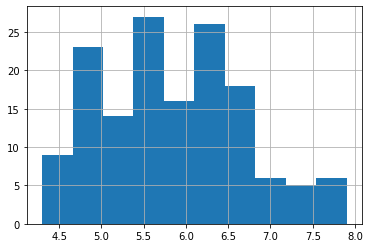

In [10]:
data['Sepal_Length'].hist()

<AxesSubplot:>

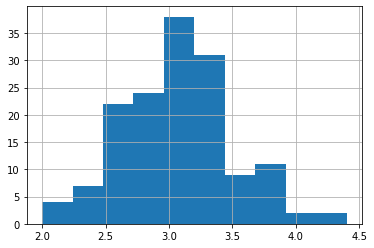

In [11]:
data['Sepal_Width'].hist()

<AxesSubplot:>

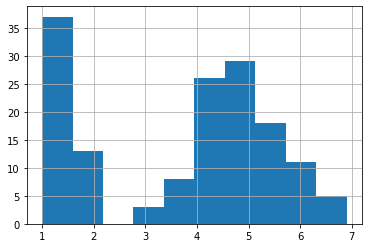

In [12]:
data['Petal_Length'].hist()

<AxesSubplot:>

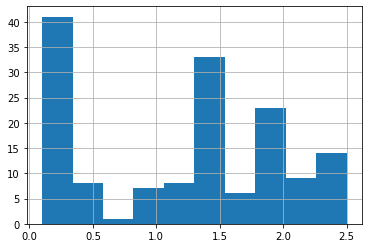

In [13]:
data['Petal_Width'].hist()

<AxesSubplot:>

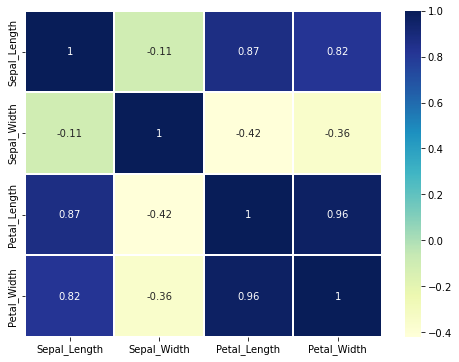

In [14]:
#correlation matrix

corrmatrix=data.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corrmatrix,linewidth=0.2,annot=True,cmap='YlGnBu')

# Model Training


In [20]:
#datas into feature and target

y=data['Classification']
x=data.drop('Classification',axis=1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# logistic regression

In [23]:

from sklearn.linear_model import LogisticRegression

In [24]:
logit_model=LogisticRegression()
logit_model=logit_model.fit(x_train,y_train)
y_pred_logit=logit_model.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
confusion_matrix(y_test,y_pred_logit)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [27]:
accuracy_score(y_test,y_pred_logit)

1.0

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(x_train,y_train)
    y_pred_KNN=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_KNN)
    metric_k.append(acc)

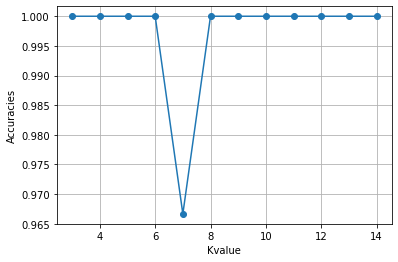

In [30]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Kvalue')
plt.ylabel('Accuracies')
plt.grid()

In [31]:
classifier=KNeighborsClassifier(n_neighbors=4)
classifier=classifier.fit(x_train,y_train)
y_pred_KNN=classifier.predict(x_test)

In [32]:
confusion_matrix(y_test,y_pred_KNN)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [33]:
accuracy_score(y_test,y_pred_KNN)

1.0

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(x_train,y_train)
y_pred_rf=rf_clf.predict(x_test)

In [36]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [37]:
accuracy_score(y_test,y_pred_rf)

1.0

For the given dataset we got 100% accuracy in all the models.

In [38]:
py_flask=LogisticRegression()
py_flask.fit(x,y)

LogisticRegression()

In [39]:
#saving model
import pickle
pickle.dump(py_flask,open('flask_model.pkl',"wb"))

In [44]:
x_test

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [41]:
load_model=pickle.load(open('flask_model.pkl',"rb"))